# Introduction to neural network classification with TensorFlow

In this notebook we'll create neural networks for classification problems.

A classification is when you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Data is a little hard to understand right now, let's visualize it.

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


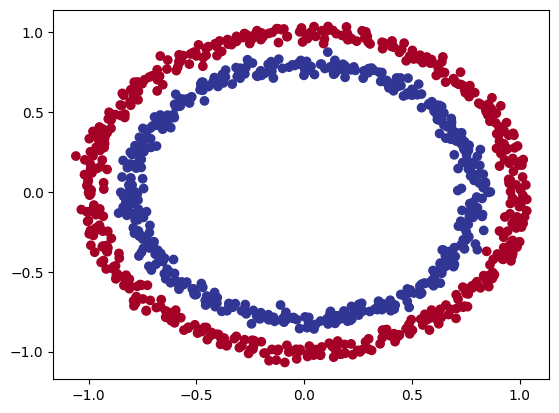

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Thing observed while using playground.tensortflow.org:

When problem is complex adding more hidden layers with more neurons may help solve a problem, changing the activation fucntion also might have a considerable impact

## Input and output shapes

In [7]:
# Check the shapes of our features yand labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working on
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
# Create train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Check the length of test and train data
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [12]:
# Import TensorFlow and set a random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
circle_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# Fit the model
circle_model.fit(X_train, y_train, epochs=5)

2024-03-21 17:25:00.960008: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 17:25:00.962632: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 17:25:00.999818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 17:25:01.676643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4817 - loss: 6.5132  
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4798 - loss: 6.5104 
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4800 - loss: 6.4875 
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4812 - loss: 6.4718 
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4826 - loss: 6.4507 


In [13]:
# Try to improve model by training for longer
circle_model.fit(X_train, y_train, epochs=200, verbose=0)
circle_model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4482 - loss: 5.2985 


[5.539508819580078, 0.4749999940395355]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as it's guessing.

In [14]:
# Try to improtve model by adding an extra layer

# Create a model
circle_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# Fit the model
circle_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
circle_model_2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5634 - loss: 5.7626 


[6.166525363922119, 0.5350000262260437]

In [16]:
# Try to improve models by adding activation functions

# 1. Create a model
circle_model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
    # used to be tf.keras.layers.Dense(1, activation="softmax")
    # it caused predictions to be wrong - all 0.99
    # found out after recrating model on a regression problem below
])

# 2. Compile the model
circle_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# 3. Fit the model
circle_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
circle_model_3.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0112 


[0.012293638661503792, 1.0]

In [18]:
circle_model_3.predict(X_test)[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[ 2.1517794 ],
       [-0.17050937],
       [ 2.067507  ],
       [-0.687819  ],
       [ 1.2112254 ],
       [ 1.2182167 ],
       [-0.58078974],
       [-0.85233134],
       [ 1.6241263 ],
       [-0.32883316]], dtype=float32)

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # Check for multi-class 
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
doing binary classification


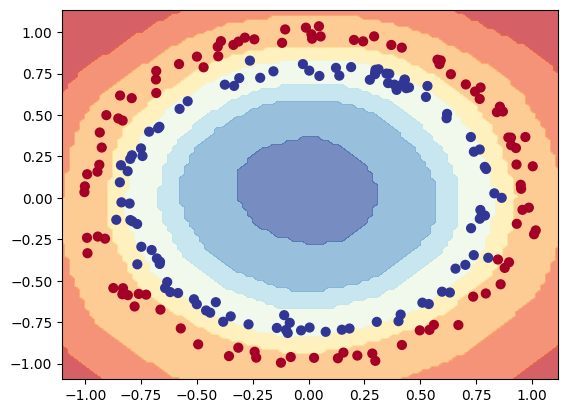

In [20]:
# Check out the predictions our models are making
plot_decision_boundary(model=circle_model_3, X=X_test, y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
doing binary classification


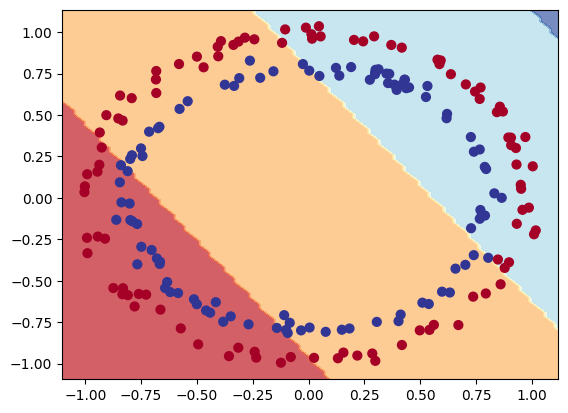

In [21]:
plot_decision_boundary(model=circle_model, X=X_test, y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
doing binary classification


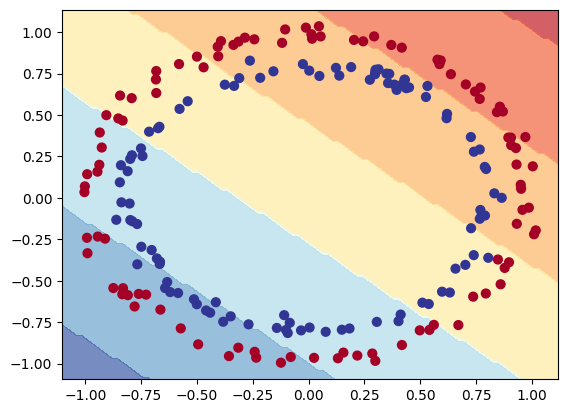

In [22]:
plot_decision_boundary(model=circle_model_2, X=X_test, y=y_test)

In [23]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression[:10], y_regression[:10]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145], dtype=int32)>)

In [24]:
# Split regression data into train and test sets
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression.numpy(), y_regression.numpy(), test_size=0.2, random_state=42)

# Fit our model to the regression data
# circle_model_3.fit(X_reg_train, y_reg_train, epochs=100) will throw error
# because model was compiled to classification problem with loss being BinaryCrossentropy

In [25]:
y_reg_train.shape

(160,)

In [26]:
# Recreate model_3 to work on a regression problem

# 1. Create a model
model_3_reg = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3_reg.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
model_3_reg.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 574.3982 - mae: 574.3982  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 498.2274 - mae: 498.2274 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425.7114 - mae: 425.7114 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 354.9421 - mae: 354.9421 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278.1157 - mae: 278.1157 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.9454 - mae: 194.9454 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.4604 - mae: 106.4604 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.5762 - mae: 49.5762 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.3651 - mae: 78.3651 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.9764 - mae: 69.9764 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2270 - mae: 49.2270 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.9543 - mae: 47.9543 
Epoch 13/1

After changing various paremeters of regression model I found out that acitvation="softmax" of last layer of circle_model_3 was causing it to train wrongly

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


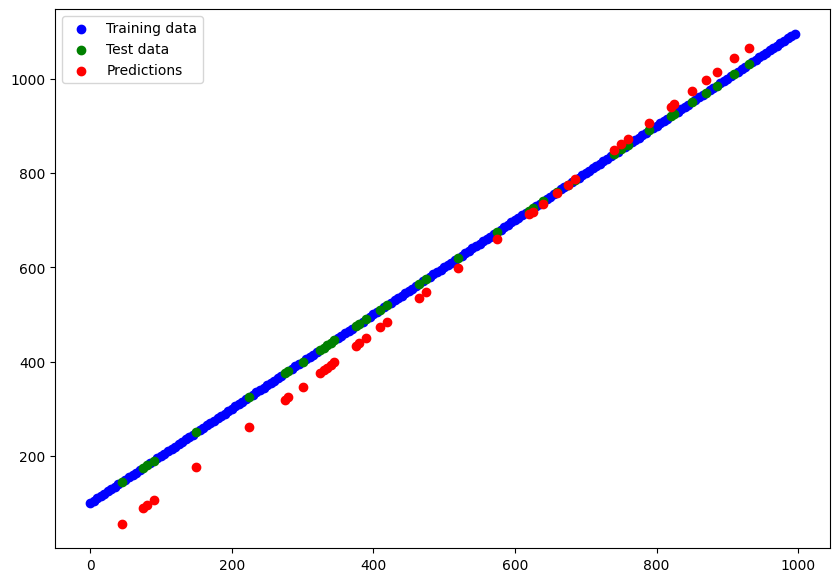

In [27]:
# Make predictions with our trained regression model
y_reg_preds = model_3_reg.predict(X_reg_test)

# Plot the models predictions agains regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()


### Our classification problem is not linear

In [28]:
# Creating non-linear model

# 1. Create the model
circle_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
circle_model_4.compile(loss=["binary_crossentropy"],
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                       metrics=["accuracy"])

# 3. Fit the model
history_4 = circle_model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4429 - loss: 3.4633   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4814 - loss: 0.7934 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4877 - loss: 0.7576 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4864 - loss: 0.7485 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4857 - loss: 0.7411 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4857 - loss: 0.7343 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4861 - loss: 0.7280 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4866 - loss: 0.7223 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4866 - loss: 0.7173 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4847 - loss: 0.7130 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4881 - loss: 0.7093 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

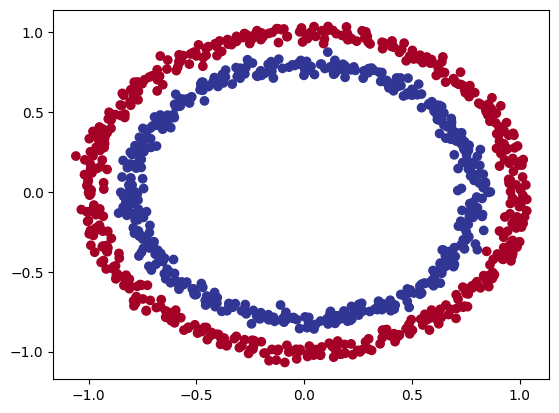

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
doing binary classification


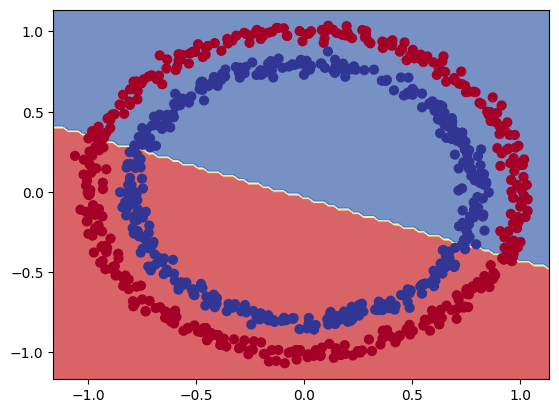

In [30]:
# Check the decision boundary 
plot_decision_boundary(model=circle_model_4, X=X_train, y=y_train)

In [31]:
# Replicate multi-layer neural network from TensorFlow playground

# 1. Create a model
circle_model_5 = tf.keras.Sequential([
    # tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
circle_model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                       metrics=["accuracy"])

# 3. Fit the model
circle_model_5.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5132 - loss: 0.6942   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.6806 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.5735 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.3010 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0966 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.1096 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9659 - loss: 0.0897 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.0544 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0398 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9848 - loss: 0.0401 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9977 - loss: 0.0182 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [32]:
# Evaluate the model
circle_model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0033 


[0.00576895521953702, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


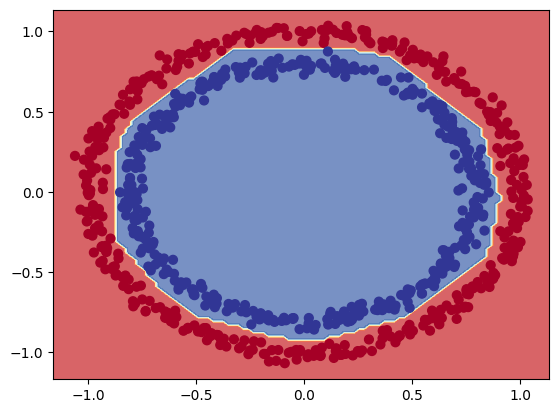

In [33]:
# Check the decision boundary
plot_decision_boundary(model=circle_model_5, X=X_train, y=y_train)

The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

In [34]:
# Create an example tensor 
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

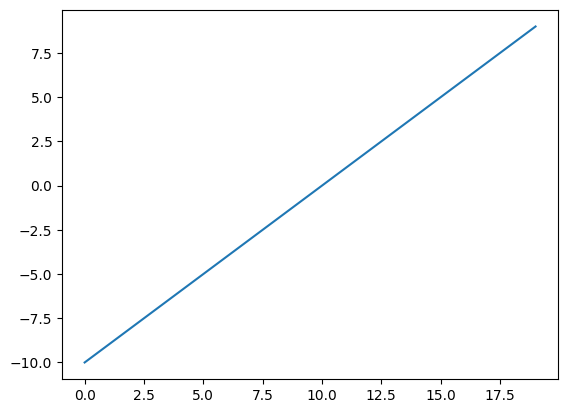

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our example tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

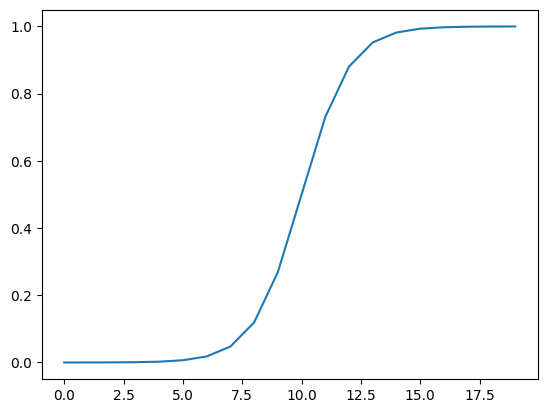

In [37]:
plt.plot(sigmoid(A))

In [38]:
for index in range(-10,11):
    # np.exp(index) == 2.781 ** -index
    print(f'{index} -> 1 / (1 + {np.exp(-index)}) =  {1 / ( 1 + np.exp(-index))}')

-10 -> 1 / (1 + 22026.465794806718) =  4.5397868702434395e-05
-9 -> 1 / (1 + 8103.083927575384) =  0.00012339457598623172
-8 -> 1 / (1 + 2980.9579870417283) =  0.0003353501304664781
-7 -> 1 / (1 + 1096.6331584284585) =  0.0009110511944006454
-6 -> 1 / (1 + 403.4287934927351) =  0.0024726231566347743
-5 -> 1 / (1 + 148.4131591025766) =  0.0066928509242848554
-4 -> 1 / (1 + 54.598150033144236) =  0.01798620996209156
-3 -> 1 / (1 + 20.085536923187668) =  0.04742587317756678
-2 -> 1 / (1 + 7.38905609893065) =  0.11920292202211755
-1 -> 1 / (1 + 2.718281828459045) =  0.2689414213699951
0 -> 1 / (1 + 1.0) =  0.5
1 -> 1 / (1 + 0.36787944117144233) =  0.7310585786300049
2 -> 1 / (1 + 0.1353352832366127) =  0.8807970779778823
3 -> 1 / (1 + 0.049787068367863944) =  0.9525741268224334
4 -> 1 / (1 + 0.01831563888873418) =  0.9820137900379085
5 -> 1 / (1 + 0.006737946999085467) =  0.9933071490757153
6 -> 1 / (1 + 0.0024787521766663585) =  0.9975273768433653
7 -> 1 / (1 + 0.0009118819655545162) =  0

In [39]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass example tensor to custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

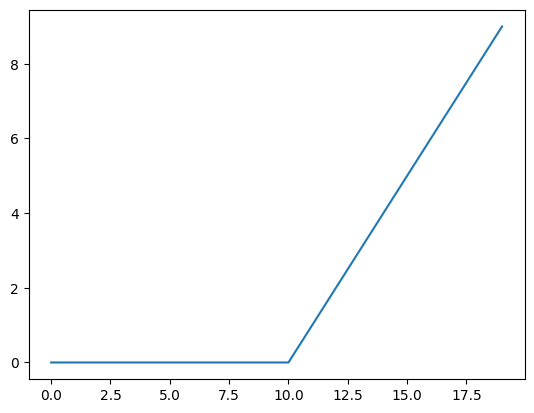

In [40]:
# plot relu modified tensor
plt.plot(relu(A))

In [41]:
# Make simpler binary classification model
tf.random.set_seed(42)

# 1. Create a model
circle_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
circle_model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                       metrics=["accuracy"])

# 3. Fit the model
history_6 = circle_model_6.fit(X_test, y_test, epochs=25)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4622 - loss: 0.6955  
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 0.6899 
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.6908 
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6901 
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6884 
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6863 
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5046 - loss: 0.6842 
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5562 - loss: 0.6814 
Epoch 9/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5712 - loss: 0.6772 
Epoch 10/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 0.6728 
Epoch 11/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5700 - loss: 0.6673 
Epoch 12/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - loss: 0.6569 


In [42]:
# Evalute the model on the dataset
circle_model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.5117 


[0.4871189594268799, 0.75]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
doing binary classification


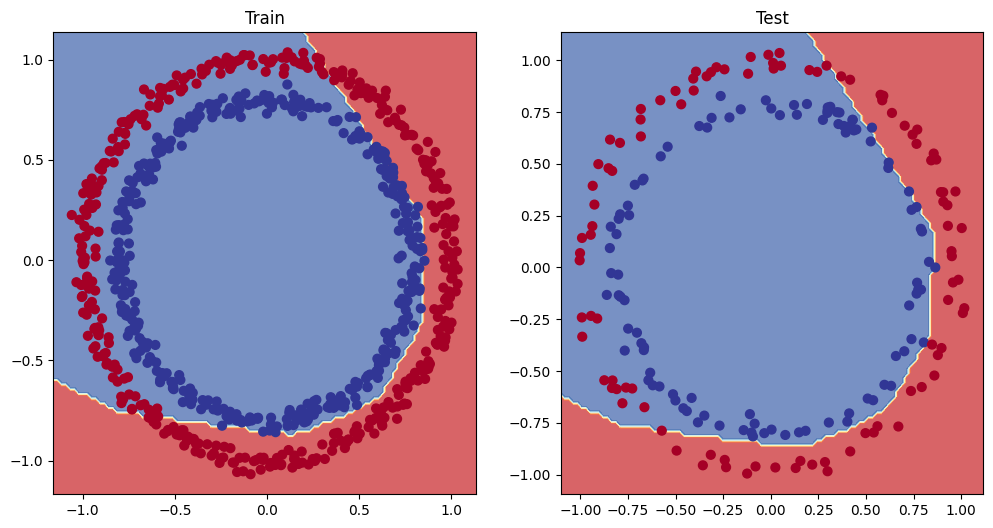

In [43]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(circle_model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circle_model_6, X=X_test, y=y_test)
plt.show()

In [44]:
# Convert the history object into a DataFrame
pd.DataFrame(history_6.history)[:10]

,accuracy,loss
0,0.450,0.698527
1,0.525,0.691764
2,0.545,0.691206
3,0.500,0.690122
4,0.500,0.689088
5,0.500,0.687361
6,0.500,0.684838
7,0.545,0.682271
8,0.565,0.678347
9,0.555,0.672453


Text(0.5, 1.0, 'model_6 loss curves')

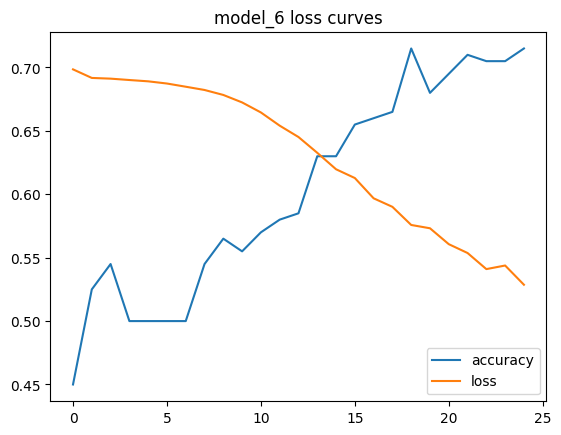

In [45]:
# Plot the loss curves
pd.DataFrame(history_6.history).plot()
plt.title("model_6 loss curves")

For many problems, the loss function going down means the model is improving.

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while its training
* Another model
* A modified loss curves plot

In [46]:
# Create a model with learning callback

# Create a model
circle_model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
circle_model_7.compile(loss="binary_crossentropy",
                       optimizer="Adam",
                       metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_7 = circle_model_7.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4975 - loss: 0.7007 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.6995 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4946 - loss: 0.6985 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4788 - loss: 0.6976 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4764 - loss: 0.6967 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 0.6958 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 0.6950 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4903 - loss: 0.6941 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4790 - loss: 0.6933 - learning_

<Axes: xlabel='epochs'>

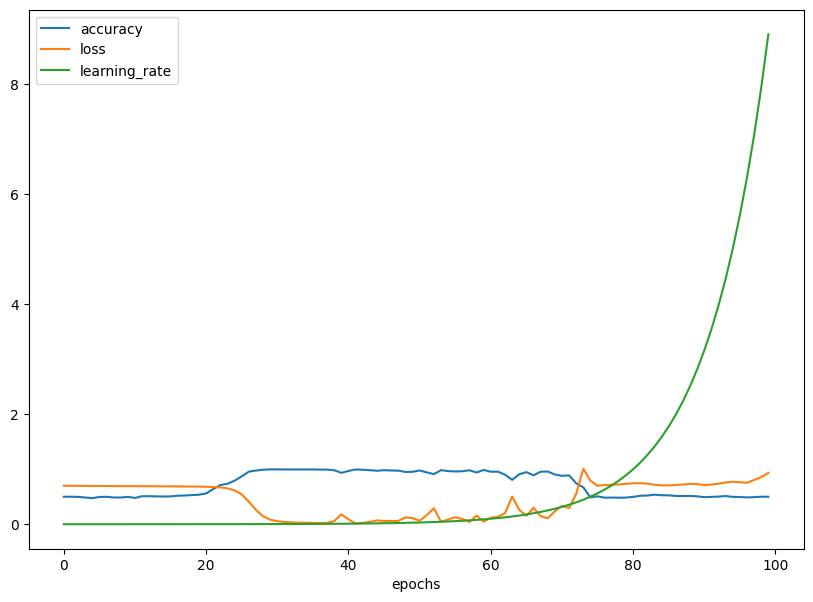

In [47]:
# Check out the history
pd.DataFrame(history_7.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

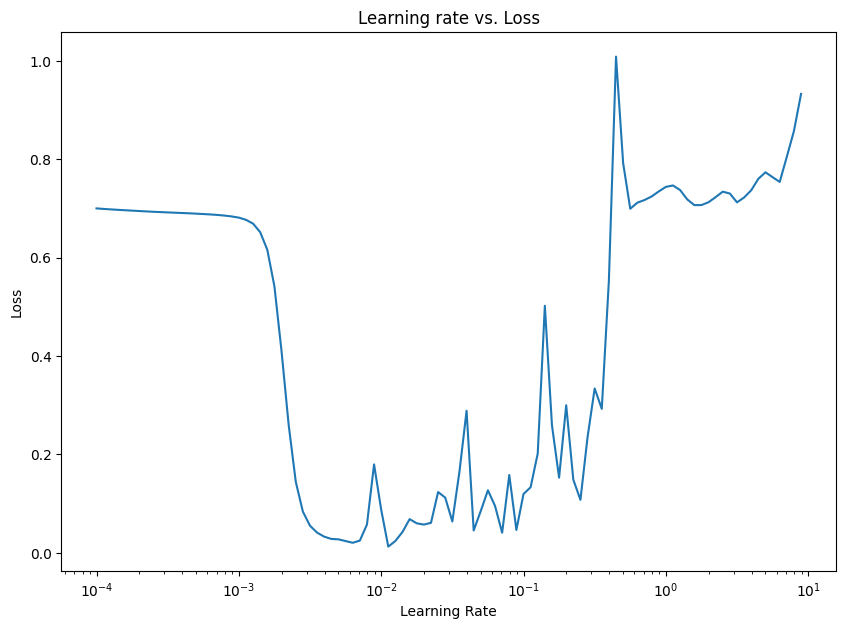

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [49]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
# Create a model with higher "ideal" learning rate with the same model

# 1. Create a model
circle_model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
circle_model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                       metrics=["accuracy"])
# 3. Fit the model
circle_model_8.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4458 - loss: 0.7042   
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.6906 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.6788 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6147 - loss: 0.6485 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7559 - loss: 0.5763 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9498 - loss: 0.4507 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9490 - loss: 0.3357 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9813 - loss: 0.2412 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9877 - loss: 0.1872 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.1500 


In [51]:
# Evaluate the model
circle_model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.1499 


[0.15612387657165527, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


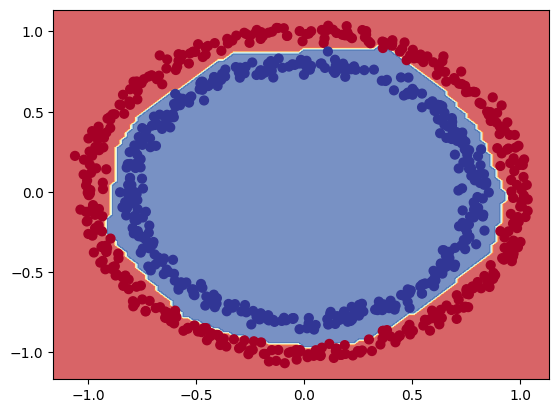

In [52]:
# Plot the decision boundaries for model 8
plot_decision_boundary(model=circle_model_8, X=X_train, y=y_train)

In [53]:
# Compare model 6 to model 8
print("Model 6:")
circle_model_6.evaluate(X_test, y_test)

print("Model 8:")
circle_model_8.evaluate(X_test, y_test)

Model 6:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.5117 
Model 8:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.1499 


[0.15612387657165527, 0.9850000143051147]

# More classification evaluation metrics

Alognside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics one should be familar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (scikit learn)

In [54]:
# Check the accuracy of our model
loss, accuracy = circle_model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9846 - loss: 0.1499 
Model loss on the test set: 0.15612387657165527
Model accuracy on the test set: 98.50%


Create confusion matrix

In [55]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [56]:
y_preds = circle_model_8.predict(X_test)
y_preds[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.89864266],
       [0.08079308],
       [0.89864266],
       [0.03702422],
       [0.8620511 ],
       [0.7753724 ],
       [0.04202409],
       [0.02068463],
       [0.89864266],
       [0.05802659]], dtype=float32)

In [57]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(y_true=y_test, y_pred=y_preds)
# This will throw ValueError: Classification metrics can't handle a mix of binary and continuous targets

Round y_preds to create binary numbers

In [58]:
y_preds_binary = tf.round(y_preds)
y_preds_binary[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [59]:
conf_mat_model_8 = confusion_matrix(y_true=y_test, y_pred=y_preds_binary)
conf_mat_model_8

array([[ 97,   3],
       [  0, 100]])

In [60]:
# Create function for assigining Confusion Matrix with labels
import numpy as np

def prettify_conf_mat(conf_mat):
    conf_mat = conf_mat.tolist()
    conf_mat[0].insert(0, "True negative")
    conf_mat[0].append("False negative")
    conf_mat[1].insert(0, "False positive")
    conf_mat[1].append("True positive")

    return conf_mat

In [61]:
prettify_conf_mat(conf_mat_model_8)

[['True negative', 97, 3, 'False negative'],
 ['False positive', 0, 100, 'True positive']]